# Covid-19 Data Analysis, Visual Representation & Statistical Research
__Presented By Ariell Dattage__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

### Dataset 1 Title: Coronavirus (COVID-19) Deaths

Data, statistical information and research retrieved from: https://ourworldindata.org/covid-deaths

In [2]:
file = pd.read_csv('covid-data.csv')

### Dataset 2 Title: COVID-19 Activity

Data, statistical information and research retrieved from: https://data.world/covid-19-data-resource-hub/covid-19-case-counts/workspace/file?filename=COVID-19+Activity.csv

In [3]:
file2 = pd.read_csv('covid-data2.csv')

/Users/ariell.dattage/opt/anaconda3/envs/virtualenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Dataset 1 Overview: Coronavirus (COVID-19) Deaths

In [4]:
file.shape

(152944, 67)

In [5]:
file.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
file.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
file.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.502940e+05,1.502390e+05,1.490880e+05,1.330640e+05,133236.000000,133104.000000,149593.000000,149538.000000,148392.000000,132376.000000,...,97631.000000,96225.000000,63127.000000,113877.000000,142738.000000,125523.000000,5.234000e+03,5234.000000,5234.000000,5234.000000
mean,2.135135e+06,8.467375e+03,8.309280e+03,5.277387e+04,170.619067,170.100488,23411.883300,107.040595,103.589947,456.920736,...,10.584645,32.758263,50.814634,3.026685,73.596164,0.725868,3.479999e+04,9.011418,16.175762,857.853331
std,1.265274e+07,5.098362e+04,4.706157e+04,2.775011e+05,831.478667,812.194863,38180.684985,372.752514,249.590269,721.942654,...,10.498802,13.521998,31.813386,2.452814,7.489772,0.149988,9.949991e+04,16.669961,31.091730,1283.239325
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.195940e+04,-28.450000,-95.920000,-1745.051271
25%,1.574000e+03,1.000000e+00,5.857000e+00,6.800000e+01,0.000000,0.143000,512.697000,0.022000,1.444000,15.829000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-9.752500e+01,-0.870000,-0.520000,-37.856745
50%,2.067100e+04,7.000000e+01,9.171400e+01,6.750000e+02,2.000000,2.286000,4015.258000,10.052000,15.887000,105.723000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,2.580050e+03,5.505000,7.205000,401.789828
75%,2.560555e+05,9.230000e+02,9.741430e+02,6.457000e+03,19.000000,20.286000,30648.408000,86.622750,99.157000,622.097750,...,19.100000,41.300000,83.241000,4.000000,78.930000,0.845000,2.147995e+04,13.887500,22.687500,1456.137413
max,3.031694e+08,2.879121e+06,2.137567e+06,5.479804e+06,18062.000000,14704.714000,341391.525000,51427.491000,7749.176000,6084.669000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.043824e+06,115.000000,374.340000,7912.067517


### Dataset 2 Overview: COVID-19 Activity

In [8]:
file2.shape

(2570924, 13)

In [9]:
file2.head()

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,303,Sherburne,Minnesota,2020-07-02,America,New York Times,1,27141.0,USA,United States,US,6,5
1,307,Sherburne,Minnesota,2020-07-03,America,New York Times,0,27141.0,USA,United States,US,4,5
2,307,Sherburne,Minnesota,2020-07-04,America,New York Times,0,27141.0,USA,United States,US,0,5
3,312,Sherburne,Minnesota,2020-07-05,America,New York Times,0,27141.0,USA,United States,US,5,5
4,317,Sherburne,Minnesota,2020-07-06,America,New York Times,0,27141.0,USA,United States,US,5,5


In [10]:
file2.columns

Index(['PEOPLE_POSITIVE_CASES_COUNT', 'COUNTY_NAME', 'PROVINCE_STATE_NAME',
       'REPORT_DATE', 'CONTINENT_NAME', 'DATA_SOURCE_NAME',
       'PEOPLE_DEATH_NEW_COUNT', 'COUNTY_FIPS_NUMBER', 'COUNTRY_ALPHA_3_CODE',
       'COUNTRY_SHORT_NAME', 'COUNTRY_ALPHA_2_CODE',
       'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_COUNT'],
      dtype='object')

In [11]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570924 entries, 0 to 2570923
Data columns (total 13 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   PEOPLE_POSITIVE_CASES_COUNT      int64  
 1   COUNTY_NAME                      object 
 2   PROVINCE_STATE_NAME              object 
 3   REPORT_DATE                      object 
 4   CONTINENT_NAME                   object 
 5   DATA_SOURCE_NAME                 object 
 6   PEOPLE_DEATH_NEW_COUNT           int64  
 7   COUNTY_FIPS_NUMBER               float64
 8   COUNTRY_ALPHA_3_CODE             object 
 9   COUNTRY_SHORT_NAME               object 
 10  COUNTRY_ALPHA_2_CODE             object 
 11  PEOPLE_POSITIVE_NEW_CASES_COUNT  int64  
 12  PEOPLE_DEATH_COUNT               int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 255.0+ MB


In [12]:
file2.describe()

,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
count,2.570924e+06,2.570924e+06,2.329832e+06,2.570924e+06,2.570924e+06
mean,3.059569e+04,2.147014e+00,3.147197e+04,1.245063e+02,6.656826e+02
std,4.643439e+05,3.767672e+01,1.636533e+04,2.355573e+03,9.741924e+03
min,0.000000e+00,-1.131700e+04,1.001000e+03,-3.491160e+05,0.000000e+00
25%,9.200000e+01,0.000000e+00,1.903500e+04,0.000000e+00,1.000000e+00
50%,1.047000e+03,0.000000e+00,3.002600e+04,1.000000e+00,1.800000e+01
75%,4.265000e+03,0.000000e+00,4.611900e+04,1.200000e+01,7.700000e+01
max,3.631793e+07,8.786000e+03,7.803000e+04,8.232250e+05,6.208300e+05


### Data Analysis, Visual Representation and Statistical Research

__Hypothesis:__ Contracting the Covid-19 Virus could be fatal.

In [13]:
total_deaths = file['total_deaths'].count()
print(f'Total Deaths in Dataset 1: {total_deaths}')

Total Deaths in Dataset 1: 133064


In [14]:
total_cases = file['total_cases'].count()
print(f'Total Positive Cases in Dataset 1: {total_cases}')

Total Positive Cases in Dataset 1: 150294


In [15]:
total_deaths2 = file2['PEOPLE_DEATH_COUNT'].count()
print(f'Total Deaths in Dataset 2: {total_deaths2}')

Total Deaths in Dataset 2: 2570924


In [16]:
total_cases2 = file2['PEOPLE_POSITIVE_CASES_COUNT'].count()
print(f'Total Positive Cases in Dataset 2: {total_cases2}')

Total Positive Cases in Dataset 2: 2570924


__Answer:__ Statistical research of both datasets show that there is correlation between the Covid-19 virus and increased mortality rates.

In [17]:
file[['total_cases', 'total_deaths']].corr()

,total_cases,total_deaths
total_cases,1.000000,0.984466
total_deaths,0.984466,1.000000


In [18]:
file2[['PEOPLE_DEATH_COUNT', 'PEOPLE_POSITIVE_CASES_COUNT']].corr()

,PEOPLE_DEATH_COUNT,PEOPLE_POSITIVE_CASES_COUNT
PEOPLE_DEATH_COUNT,1.000000,0.893967
PEOPLE_POSITIVE_CASES_COUNT,0.893967,1.000000


__Hypothesis:__ The presence of smoking is related to increased mortality rates amongst individuals with the Covid-19 Virus.

In [19]:
file[['male_smokers', 'female_smokers', 'total_deaths']].corr()

,male_smokers,female_smokers,total_deaths
male_smokers,1.000000,0.206306,-0.004893
female_smokers,0.206306,1.000000,-0.007291
total_deaths,-0.004893,-0.007291,1.000000


In [20]:
male_smokers = file['male_smokers'].count()
print(f'Male Smokers : {male_smokers}')

Male Smokers : 96225


In [21]:
female_smokers = file['female_smokers'].count()
print(f'Female Smokers: {female_smokers}')

Female Smokers: 97631


__Answer:__ Data analysis does not support original hypothesis. There is no correlation between smokers and increased mortality rates due to Covid-19.

<AxesSubplot:>

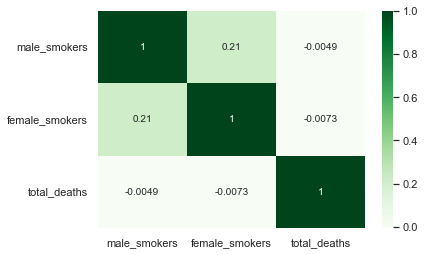

In [22]:
sns.heatmap(file[['male_smokers', 'female_smokers', 'total_deaths']].corr(), cmap="Greens", annot=True)

__Hypothesis:__ ICU and hospital admissions directly correlates with individuals that test positive for the Covid-19 Virus.

In [23]:
file[['total_cases', 'positive_rate', 'icu_patients', 'hosp_patients']].corr()

,total_cases,positive_rate,icu_patients,hosp_patients
total_cases,1.000000,-0.016405,0.760832,0.711487
positive_rate,-0.016405,1.000000,0.155454,0.189667
icu_patients,0.760832,0.155454,1.000000,0.964496
hosp_patients,0.711487,0.189667,0.964496,1.000000


In [24]:
total_cases = file['total_cases'].count()
print(f'Total Cases: {total_cases}')

Total Cases: 150294


In [25]:
positive_rate = file['positive_rate'].count()
print(f'Positive Rate: {positive_rate}')

Positive Rate: 69318


In [26]:
icu_patients = file['icu_patients'].count()
print(f'ICU Patients: {icu_patients}')

ICU Patients: 19314


In [27]:
hosp_patients = file['hosp_patients'].count()
print(f'Hospital Patients: {hosp_patients}')

Hospital Patients: 21292


__Answer:__ Data analysis supports the original hypothesis. There is a correlation between testing postive for Covid-19 and increased hospitalizations.

<AxesSubplot:>

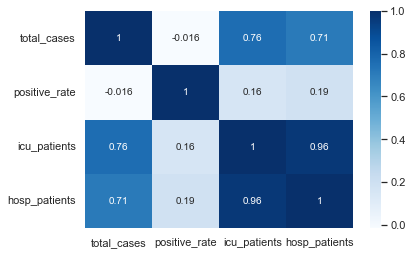

In [28]:
sns.heatmap(file[['total_cases', 'positive_rate', 'icu_patients', 'hosp_patients']].corr(), cmap="Blues", annot=True)

__Hypothesis:__ Age directly correlates with increased mortality rates amongst individuals that contract the Covid-19 Virus.

In [29]:
file[['aged_65_older', 'aged_70_older', 'total_deaths']].corr()

,aged_65_older,aged_70_older,total_deaths
aged_65_older,1.000000,0.994370,0.026061
aged_70_older,0.994370,1.000000,0.023622
total_deaths,0.026061,0.023622,1.000000


In [30]:
aged_65_older = file['aged_65_older'].count()
print(f'Aged 65 & Older : {aged_65_older}')

Aged 65 & Older : 125664


In [31]:
aged_70_older = file['aged_70_older'].count()
print(f'Aged 70 & Older : {aged_70_older}')

Aged 70 & Older : 126362


__Answer:__ Data analysis supports the original hypothesis, that age directly coorelates with an increase in Covid-19 death rates.

<AxesSubplot:>

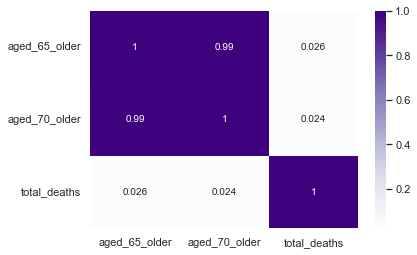

In [32]:
sns.heatmap(file[['aged_65_older', 'aged_70_older', 'total_deaths']].corr(), cmap="Purples", annot=True)

__Hypothesis:__ A country's overall vaccination rate directly affects that country's mortality rates.

In [33]:
file['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [34]:
file[['people_vaccinated_per_hundred', 'total_deaths_per_million']].corr()

,people_vaccinated_per_hundred,total_deaths_per_million
people_vaccinated_per_hundred,1.000000,0.294501
total_deaths_per_million,0.294501,1.000000


In [35]:
grouped = file.groupby("location")
L = []
for location, location_df in grouped:
    location_df["people_vaccinated_per_hundred-7"] = location_df["people_vaccinated_per_hundred"].shift(7)
    location_df["people_vaccinated_per_hundred-14"] = location_df["people_vaccinated_per_hundred"].shift(14)
    L.append(location_df)
    
db = pd.concat(L)

In [36]:
display(db.head()), display(db.tail())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,people_vaccinated_per_hundred-7,people_vaccinated_per_hundred-14
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,people_vaccinated_per_hundred-7,people_vaccinated_per_hundred-14
152939,ZWE,Africa,Zimbabwe,2022-01-03,216087.0,1873.0,1519.714,5047.0,30.0,19.857,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,27.20,26.90
152940,ZWE,Africa,Zimbabwe,2022-01-04,217678.0,1591.0,1447.143,5078.0,31.0,19.714,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,27.21,26.96
152941,ZWE,Africa,Zimbabwe,2022-01-05,219057.0,1379.0,1644.143,5092.0,14.0,21.714,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,27.25,27.03
152942,ZWE,Africa,Zimbabwe,2022-01-06,220178.0,1121.0,1207.143,5108.0,16.0,15.857,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN,27.10
152943,ZWE,Africa,Zimbabwe,2022-01-07,221282.0,1104.0,1146.286,5136.0,28.0,18.857,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,27.33,27.14


(None, None)

In [37]:
db[['people_vaccinated_per_hundred-7', 'people_vaccinated_per_hundred-14','total_deaths_per_million']].corr()

,people_vaccinated_per_hundred-7,people_vaccinated_per_hundred-14,total_deaths_per_million
people_vaccinated_per_hundred-7,1.000000,0.998094,0.285773
people_vaccinated_per_hundred-14,0.998094,1.000000,0.276583
total_deaths_per_million,0.285773,0.276583,1.000000


<AxesSubplot:>

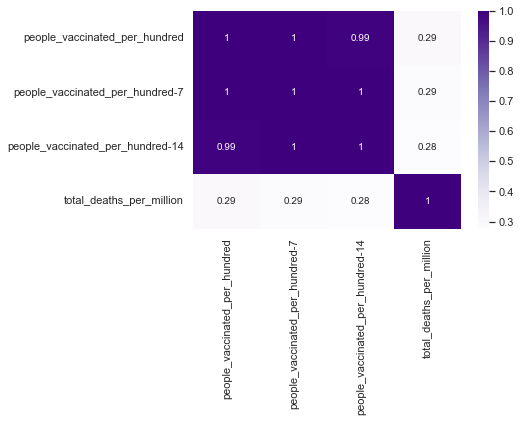

In [38]:
sns.heatmap(db[['people_vaccinated_per_hundred', 'people_vaccinated_per_hundred-7', 'people_vaccinated_per_hundred-14', 'total_deaths_per_million']].corr(), cmap="Purples", annot=True)


__Answer:__ Data analysis supports the original hypothesis, that a country's overall vaccination rate directly affects that country's mortality rates.

<!-- __Answer:__ Data analysis supports the original hypothesis, that being fully vaccinated against Covid-19 decreases mortality rates. -->

<!-- __Hypothesis:__ Being in extrememe poverty decreases survival rates. -->

<!-- __Answer:__ Data analysis does not support original hypothesis. There is no correlation between poverty levels and increased mortality rates due to Covid-19. -->